In [1]:
!pip install tensorflow-datasets

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load dataset (first time it will download ~800MB)
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,  # returns (image, label)
    with_info=True,
)

In [3]:
IMG_SIZE = 128

def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

BATCH_SIZE = 32

ds_train = ds_train.map(format_example).batch(BATCH_SIZE).prefetch(1)
ds_val = ds_val.map(format_example).batch(BATCH_SIZE).prefetch(1)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary output
])


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5  # You can increase this later
)


Epoch 1/5


ValueError: in user code:

    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, None, 3)


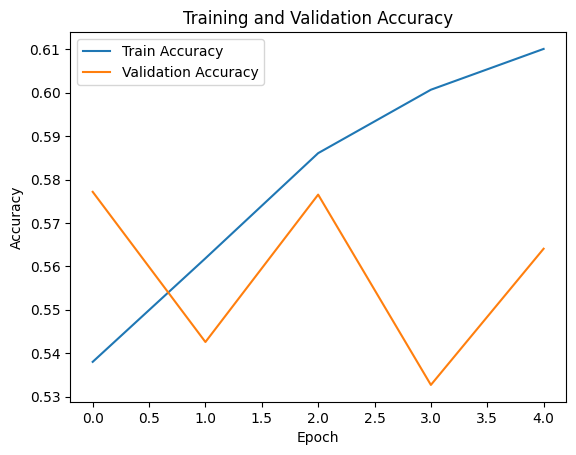

In [7]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [11]:
for image, label in ds_val.take(1):
    prediction = model.predict(image)
    print("Predicted:", prediction[0][0], "Actual:", label[20].numpy())
    

ValueError: in user code:

    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\realme 1\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 489, 3)
